# Analysis to Support Housing Development

Background information:
We've been employed by a Real Estate Development Firm. They've identified a plot of land that's similar to California in terms of the layout, terrain & facilities. They wish to take over specific plots and develop & sell property. They wish to target the high income group and have posed the following questions & wish to learn from California's real estate success:

Q1. What are the locations that the high income group might be drawn to?

Q2. Based on income classification, explore which housing features the high income group is concerned about. (Ex - # of Rooms, HouseAge, Population)

Q3. Is there a relationship between High Income Groups & High Value Houses? This might help them determine pricing.

### Import Python library, import data

In [1]:
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

california_housing = fetch_california_housing(as_frame=True)
cal_house_df=california_housing.frame

### Viewing Data Description

In [2]:
print(fetch_california_housing(as_frame=True).DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

There are no missing attribute values. This is positive for our analysis.

### Viewing Statistics to Understand Distribution

In [3]:
cal_house_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


From this we can get the basic distribution of the data.
Next we use histograms to plot each variabl to get more intuitive information

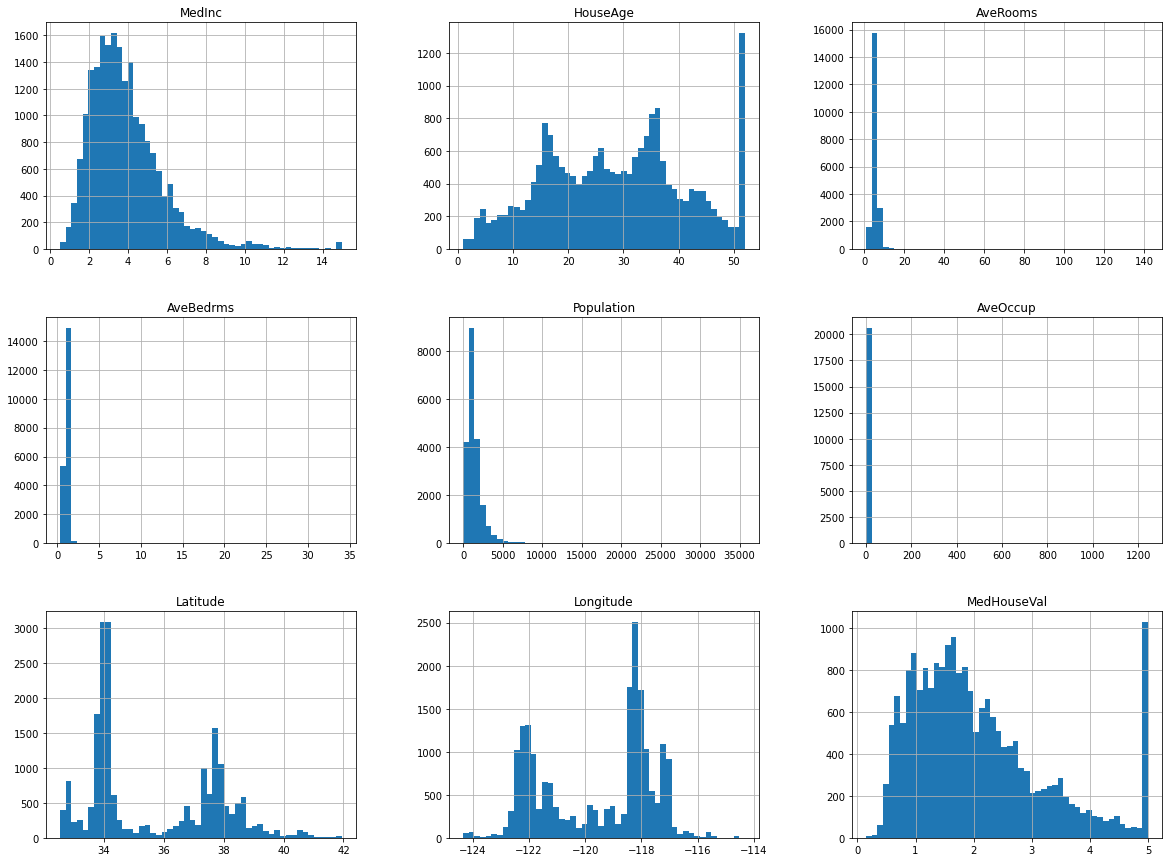

In [4]:
cal_house_df.hist(bins=50, figsize=(20, 15))
plt.show()

It is worth noting that there is an upper limit to median house age & house value.
From the above histograms we notice that there seem to be two clusters in the longitude and latitude data.
that are significantly higher than the other points.
We will visualize it in Q1.

## Seeking Answer to Question 1

On the map of California different sizes of apertures represent different numbers of people, with cooler to warmer colors indicating rising income levels. The heat map clearly shows that high-income people are concentrated in the center of California's two major cities and are closer to the coast.

Graph 1:
NOTE - The map being used below was generated by adding the minimum and maximum latitude and longitude
to https://www.openstreetmap.org/export#map=5/51.500/-0.100
The size of the dot represents the population, and the color temperature represents the income.


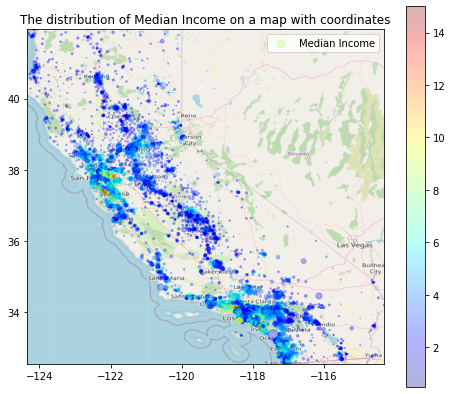

In [5]:
def income_on_map(dataset,med_income):
    # Set the latitude and longitude extremum
    bbox = (dataset.Longitude.min(),dataset.Longitude.max(),dataset.Latitude.min(),dataset.Latitude.max())
    # Add California map as background image
    cal_map = plt.imread('map-3.png')
    # Setting the image size
    fig, ax = plt.subplots(figsize = (8,7))
    # Draw and set different parameters.
    sc = ax.scatter(dataset.Longitude, dataset.Latitude, zorder=1, alpha= 0.3, c=med_income, 
                    cmap=plt.get_cmap("jet"), s=dataset['Population']/300, label='Median Income')
    # Set the title
    ax.set_title('The distribution of Median Income on a map with coordinates')
    # Set the x, y
    ax.set_xlim(bbox[0],bbox[1])
    ax.set_ylim(bbox[2],bbox[3])
    # Drawing
    ax.imshow(cal_map, zorder=0, extent = bbox, aspect= 'equal')
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels)
    # Set the color bar
    plt.colorbar(sc)
    ax.legend()

print('''\033[1mGraph 1:\033[0m
NOTE - The map being used below was generated by adding the minimum and maximum latitude and longitude\nto https://www.openstreetmap.org/export#map=5/51.500/-0.100''')
print('''The size of the dot represents the population, and the color temperature represents the income.''')
income_on_map(cal_house_df,cal_house_df['MedInc'])

It is worth noting that markets also exist close to the inland. Although these dots are cooler (lower income), they tend to have larger size (higher population).

## Seeking Answer to Question 2

The analysis below shows that high income groups have significantly newer houses & higher number of rooms. However, we know from the introduction that the average number of rooms in the data might be skewed because of empty houses in certain block groups.
Hence, the only conclusive take away is that Higher Income Groups seem to prefer relatively newer houses - architectural insights can be drawn from newer builds.

Graph 2:
Checking the distribution of the Median Income to create bins 


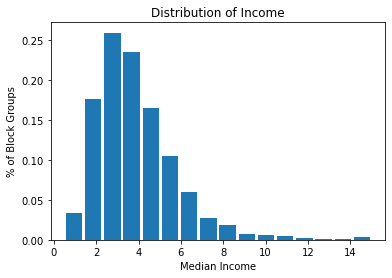

In [6]:
# To set the size of the interval, you need to look at the income distribution.
def get_distrib_income_chart():
    print('''\033[1mGraph 2:
Checking the distribution of the Median Income to create bins \033[0m''')
    # Drawing
    plt.hist(cal_house_df['MedInc'], density=True, bins=16, rwidth=0.85)
    # Set the x, y axis
    plt.ylabel('% of Block Groups')
    plt.xlabel('Median Income')
    # Set the title
    plt.title('Distribution of Income')

get_distrib_income_chart()

Although middle income group has the highest proportion, our focus is to draw insights for the high income group for our clients.

In [7]:
# Income group classification function
def income_class(x):
    if x['MedInc'] <= 2:
        val = '0-2'
    elif 4 >= x['MedInc'] > 2:
        val = '2-4'
    elif 6 >= x['MedInc'] > 4:
        val = '4-6'
    else:
        val = '>6'
    return val
def high_income_class(x):
    if x['MedInc'] > 6:
        val = '>6'
    else:
        val = '<=6'
    return val
 

# Setting the table background color
color_setting = sns.light_palette("green", as_cmap=True)
# Creating a Categorical Variable with Income Classes & Another to Demarcate High Income Class
cal_house_df['MedIncClass'] = cal_house_df.apply(income_class, axis=1)
cal_house_df['MedIncHighvsOthers'] = cal_house_df.apply(high_income_class, axis=1)
# Obtain housing information data forms for different income groups
print('''\033[1mTable 1: Checking if there is a trend across income buckets
Comparing Mean of Variables across Income\033[0m''')
cal_house_df[['MedIncClass','HouseAge','AveRooms','AveBedrms','Population','AveOccup']]\
            .groupby(['MedIncClass'])\
            .agg({'MedIncClass':'count', 'HouseAge':'mean', 'AveRooms':'mean', 'AveBedrms':'mean', 'Population':'mean', 'AveOccup':'mean'})\
            .rename(columns={'MedIncClass':'Volume', 'HouseAge':'Mean HouseAge', 'AveRooms':'Mean AveRooms', 'AveBedrms':'Mean AveBedrms', 'Population':'Mean Population', 'AveOccup':'Mean AveOccup'}).reset_index()\
            .style.background_gradient(cmap = color_setting, axis=0)

Table 1: Checking if there is a trend across income buckets
Comparing Mean of Variables across Income


,MedIncClass,Volume,Mean HouseAge,Mean AveRooms,Mean AveBedrms,Mean Population,Mean AveOccup
0,0-2,2457,31.842898,4.463611,1.156738,1265.984941,3.168088
1,2-4,10096,29.483558,5.004611,1.108246,1443.298336,2.927211
2,4-6,5725,27.040873,5.900280,1.072246,1477.179738,3.095282
3,>6,2362,25.574090,7.104916,1.043949,1389.890347,3.522742


In [8]:
# Obtain housing information data forms for high income groups
print('\033[1mTable 2: Checking if there is a difference between average values for High Income Class vs Others\033[0m')
cal_house_df[['MedIncHighvsOthers','HouseAge','AveRooms','AveBedrms','Population','AveOccup']]\
            .groupby(['MedIncHighvsOthers'])\
            .agg({'MedIncHighvsOthers':'count', 'HouseAge':'mean', 'AveRooms':'mean', 'AveBedrms':'mean', 'Population':'mean', 'AveOccup':'mean'})\
            .rename(columns={'MedIncHighvsOthers':'Volume', 'HouseAge':'Mean HouseAge', 'AveRooms':'Mean AveRooms', 'AveBedrms':'Mean AveBedrms', 'Population':'Mean Population', 'AveOccup':'Mean AveOccup'}) .reset_index()\
            .style.background_gradient(cmap = color_setting, axis=0)

Table 2: Checking if there is a difference between average values for High Income Class vs Others


,MedIncHighvsOthers,Volume,Mean HouseAge,Mean AveRooms,Mean AveBedrms,Mean Population,Mean AveOccup
0,<=6,18278,29.035617,5.212427,1.103489,1430.075446,3.012234
1,>6,2362,25.574090,7.104916,1.043949,1389.890347,3.522742


We may conclude that people with higher incomes prefer newer, more spacious homes.

## Seeking Answer to Question 3

Checking the Relationship between Median Income & Median House Value using a Scatter Plot

raph 3: Median Income vs Median House Value


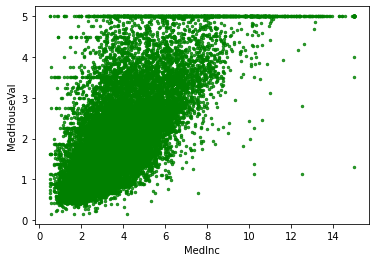

In [9]:
# See the scatter plot of income and house prices
def get_scatter_inc_price():
    cal_house_df.plot(kind='scatter', x='MedInc', y='MedHouseVal', alpha=0.8, s = 6, c = 'green')

print('\033[1Graph 3: Median Income vs Median House Value\033[0m')
get_scatter_inc_price()

From the scatter plot, it is clear that most of the data are concentrated in the middle and lower regions, corresponding to middle income group and middle housing value.
We also want to check if there is a directional relationship between the variables for high income group. 
#### Checking the distribution of the Median House Value to create bins.

 Graph 4: Distribution of House Value


Text(0.5, 0, 'Median House Value')

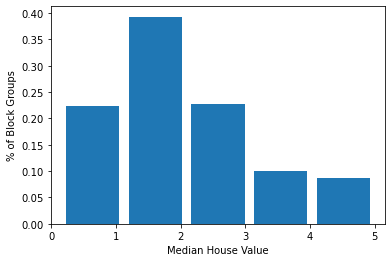

In [10]:
print('\033[1m Graph 4: Distribution of House Value\033[0m')
plt.hist(cal_house_df['MedHouseVal'], density=True, bins=5, rwidth=0.85)
plt.ylabel('% of Block Groups')
plt.xlabel('Median House Value')

In [11]:
# Housing price classification function
def house_value_class(x):
    if x['MedHouseVal'] <= 1:
        val = '0-1'
    elif 2 >= x['MedHouseVal'] > 1:
        val = '1-2'
    elif 3 >= x['MedHouseVal'] > 2:
        val = '2-3'
    else:
        val = '>3'
    return val
# Creating a Categorical Variable with House Value Classess
cal_house_df['MedHouseValClass'] = cal_house_df.apply(house_value_class, axis=1)

In [12]:
# Creating a Pivot to depict distribution of house values across income classes
print('\033[1m Table 3: Median Income vs Median House Value\033[0m')
pd.crosstab(index= cal_house_df.MedIncClass, columns= cal_house_df.MedHouseValClass, 
            values= cal_house_df.Population, aggfunc = 'count',margins=True,margins_name='All',
            normalize= 'index')\
            .style.format(formatter={"0-1": "{:.0%}", "1-2": "{:.0%}","2-3": "{:.0%}", ">3": "{:.0%}"})\
            .background_gradient(cmap = 'Greens', axis=None)

 Table 3: Median Income vs Median House Value


MedHouseValClass,0-1,1-2,2-3,>3
MedIncClass,,,,
0-2,58%,34%,5%,3%
2-4,21%,53%,19%,7%
4-6,2%,35%,41%,23%
>6,0%,4%,23%,73%
All,18%,40%,24%,19%


The values represent the share of the distribution in the row, and we note that majority of the high income group opts for high value houses (with value greater than $300,000)

## Some additional interesting questions that might benefit the client

House age can also be used as a time axis, and after statistics found that every 10 years or so will usher in a small peak purchase.

 Graph 5: Housing Population over Time


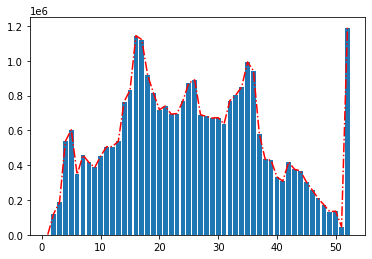

In [13]:
# Time and housing population image generating function
def get_chart_by_time():
    # Count the total number
    group_population_by_age = cal_house_df['Population'].groupby(cal_house_df['HouseAge']).sum()
    # Setting drawing parameters
    plt.plot(group_population_by_age.keys(), group_population_by_age.values, color="red", linestyle="-.")
    plt.bar(x=group_population_by_age.keys(), height=group_population_by_age.values)
    plt.show()

print('\033[1m Graph 5: Housing Population over Time\033[0m')
get_chart_by_time()

As we can see from the chart above, the number of people with a median house age of 5,15,25,35,45 seems to be significantly higher than before and after these time points.
As a result, some firms may be thinking about where development should be more attractive before the next peak happens(around 5 years after).

We already have some useful information from the Q1 map. We know the two major cities (San Francisco and Los Angeles). What else can we learn about the future of housing development?

 Graph 6: Relationship between housing age and housing population based on latitude and longitude coordinates


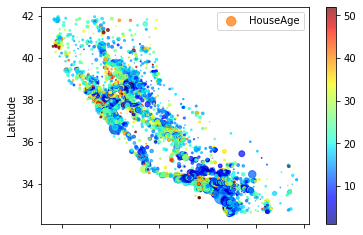

The size of the dot represents the population, and the color temperature represents the HouseAge.


In [14]:
# Generate a relationship between the age of the house and the number of people living in it based on latitude and longitude coordinates
def houseage_on_map(dataset):
    # Setting drawing parameters
    dataset.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.7, s=dataset['Population']/200,
        label='HouseAge', c=dataset['HouseAge'],
       cmap=plt.get_cmap("jet"), colorbar=True)
    plt.legend()
    plt.show()
    
print('\033[1m Graph 6: Relationship between housing age and housing population based on latitude and longitude coordinates\033[0m')
houseage_on_map(cal_house_df)
print('''The size of the dot represents the population, and the color temperature represents the HouseAge.''')

From this, we can see that the areas with smaller median house age tend to be distributed outside the two cities and tend to develop inland.

### Report

With the three questions above, we have been able to come up with some useful information for property developers. On top of this, we have examined some noteworthy directions regarding the future of property. The conclusions drawn may be biased due to the limited data available.

It is worth noting that new properties tend to move geographically away from the two major clusters (i.e., San Francisco and Los Angeles) possibly due to high development costs or limited real estate resources. By examining the relationship between population and Median House Age, we note that there may be a cyclical pattern of housing purchase peaks of around 10 years. The next most recent peak should be in 5 years and is of interest. By examining the correlation between median house value and location, as well as median income, we conclude that higher income groups tend to favor higher value newer homes, which are located closer to the coast. This helps us to determine the pricing of new developments.

An additional recommendation from the limited data available is that property resources closer to the interior should also be acquired, targeting the larger middle-income group to reduce the risk of investment and achieve a stable return.

#### Graph 1, Table 2 and Table 3 are the primary views used to answer the problem statement